# Engine Control Unit (ECU) Data Anomaly Detection

This project demonstrates a basic anomaly detection workflow for Engine Control Unit (ECU) data using Python and common data science libraries.

## Project Overview

The goal of this project is to identify unusual patterns or anomalies in simulated ECU data that might indicate potential issues or malfunctions. The workflow involves:

1. **Data Generation:** Simulating ECU data including parameters like RPM, vehicle speed, coolant temperature, throttle position, fuel level, and O2 sensor voltage.
2. **Data Preprocessing:** Scaling the numerical features using `MinMaxScaler` to ensure they contribute equally to the anomaly detection model.
3. **Anomaly Detection:** Applying the Isolation Forest algorithm to identify data points that are significantly different from the majority of the data.
4. **Visualization:** Plotting the vehicle speed data and highlighting the detected anomalies to visually inspect the results.
5. **Anomaly Analysis:** Displaying the data points identified as anomalies.

## Libraries Used

- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical operations and data generation.
- `sklearn`: For data preprocessing (MinMaxScaler) and anomaly detection (IsolationForest).
- `matplotlib`: For data visualization.
- `shap`: For explaining the output of the anomaly detection model (optional, but included in the provided code).

## How to Run

1. Ensure you have the necessary libraries installed (`pip install pandas numpy scikit-learn matplotlib shap`).
2. Run the code cells sequentially in a Python environment (like Google Colab or a Jupyter Notebook).
3. The output will show the head of the generated and scaled dataframes, a plot visualizing the anomalies, and the details of the detected anomalies.

## Potential Extensions

- Explore other anomaly detection algorithms (e.g., Local Outlier Factor, One-Class SVM).
- Implement more sophisticated data preprocessing techniques.
- Integrate with real-world ECU data streams.
- Develop a more interactive visualization dashboard.
- Investigate the root causes of detected anomalies based on domain knowledge.

In [15]:
import pandas as pd
import numpy as np

In [16]:
timestamps = pd.date_range(start="2025-01-01 10:00:00", periods=1000, freq="S")

/tmp/ipython-input-2104203732.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  timestamps = pd.date_range(start="2025-01-01 10:00:00", periods=1000, freq="S")


In [17]:
# Generate a data
np.random.seed(42)
rpm = np.random.normal(1500, 300, size=1000).clip(600, 6000)
speed = np.random.normal(50, 15, size=1000).clip(0, 200)
coolant_temp = np.random.normal(90, 5, size=1000).clip(60, 120)
throttle_position = np.random.normal(30, 10, size=1000).clip(0, 100)
fuel_level = np.random.uniform(20, 100, size=1000)
o2_voltage = np.random.uniform(0.7, 0.9, size=1000)


In [18]:
# Collecting this data
data = pd.DataFrame({
    "timestamp": timestamps,
    "rpm": rpm,
    "vehicle_speed": speed,
    "coolant_temp": coolant_temp,
    "throttle_position": throttle_position,
    "fuel_level": fuel_level,
    "o2_sensor_voltage": o2_voltage
})

In [19]:
data.to_csv("ecu_data.csv", index=False)

Load data

In [20]:
df = pd.read_csv("ecu_data.csv")
print(df.head())

             timestamp          rpm  vehicle_speed  coolant_temp  \
0  2025-01-01 10:00:00  1649.014246      70.990332     86.624109   
1  2025-01-01 10:00:01  1458.520710      63.869505     89.277407   
2  2025-01-01 10:00:02  1694.306561      50.894456     86.037900   
3  2025-01-01 10:00:03  1956.908957      40.295948     88.460192   
4  2025-01-01 10:00:04  1429.753988      60.473350     80.531927   

   throttle_position  fuel_level  o2_sensor_voltage  
0          10.921924   58.801439           0.733772  
1          21.396150   26.832242           0.792135  
2          25.863945   97.796911           0.761418  
3          48.876877   61.440835           0.707032  
4          35.565531   69.134900           0.764629  


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
numerical_data = df.drop(columns=['timestamp'])

In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [24]:
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)
print(scaled_df.head())

        rpm  vehicle_speed  coolant_temp  throttle_position  fuel_level  \
0  0.510266       0.707548      0.337521           0.165514    0.482129   
1  0.417605       0.630150      0.413921           0.335204    0.079764   
2  0.532297       0.489121      0.320641           0.407586    0.972926   
3  0.660033       0.373922      0.390390           0.780414    0.515348   
4  0.403612       0.593236      0.162099           0.564760    0.612186   

   o2_sensor_voltage  
0           0.168750  
1           0.460791  
2           0.307086  
3           0.034946  
4           0.323156  


In [25]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
model.fit(scaled_df)

df['anomaly'] = model.predict(scaled_df)

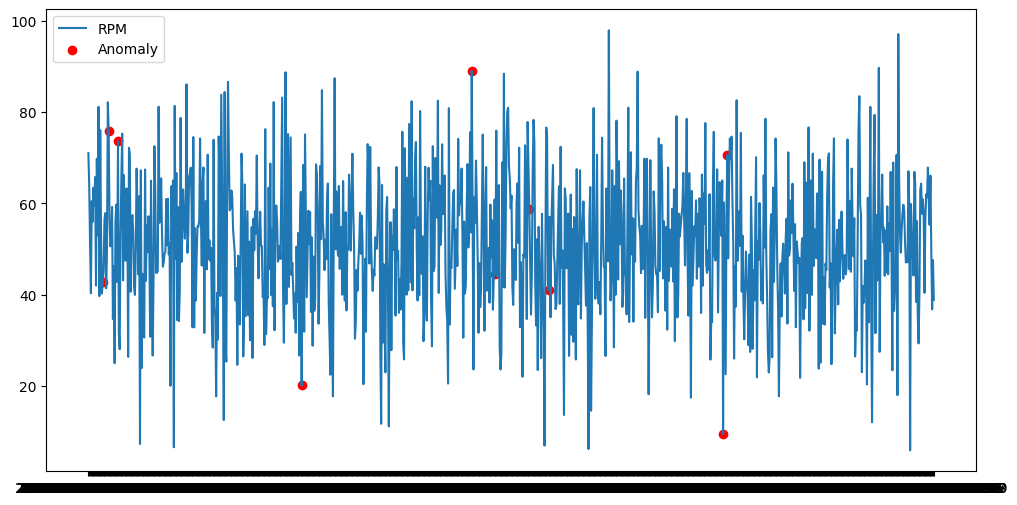

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['vehicle_speed'], label='RPM')
plt.scatter(df['timestamp'][df['anomaly'] == -1], df['vehicle_speed'][df['anomaly'] == -1], color='red', label='Anomaly')
plt.legend()
plt.show()

In [27]:
anomalies = df[df['anomaly'] == -1]
print(anomalies.head())

               timestamp          rpm  vehicle_speed  coolant_temp  \
17   2025-01-01 10:00:17  1594.274200      42.741712     79.980688   
24   2025-01-01 10:00:24  1336.685183      75.913148     74.902439   
35   2025-01-01 10:00:35  1133.746905      73.609801    103.798300   
252  2025-01-01 10:04:12  2136.646859      20.093965     82.744122   
453  2025-01-01 10:07:33  1651.213955      89.025247     86.421200   

     throttle_position  fuel_level  o2_sensor_voltage  anomaly  
17            1.678444   29.536835           0.704230       -1  
24           11.302583   87.519478           0.710456       -1  
35           34.468725   27.959574           0.716388       -1  
252          36.386602   24.397305           0.716295       -1  
453          24.393924   22.750149           0.899712       -1  


 97%|=================== | 969/1000 [00:11<00:00]       

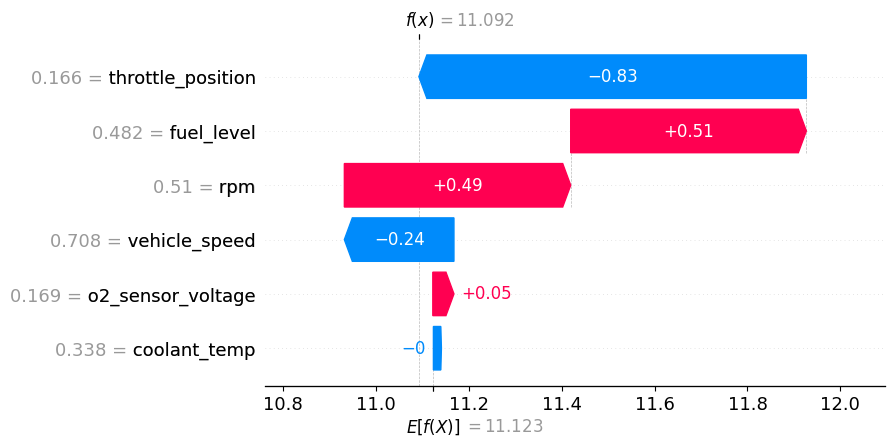

In [28]:
import shap
explainer = shap.Explainer(model, scaled_df)
shap_values = explainer(scaled_df)

shap.plots.waterfall(shap_values[0])